# Challenge: Backtest on Other Datasets

## Download data from `yfinance`

In [1]:
import yfinance as yf

In [2]:
ticker = 'NFLX'

In [5]:
df_stock = yf.download(tickers=ticker)
df_stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600
2024-03-20,619.950012,629.510010,618.340027,627.690002,627.690002,2639500


Visualize the stock using Plotly Graph Objects

In [10]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df_stock.index, 
                              open=df_stock['Open'],
                              close=df_stock['Close'],
                              low=df_stock['Low'],
                              high=df_stock['High'])])
fig.show()

## Preprocess the data

### Filter the date range

- Since 1 year ago at least

In [12]:
df_stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600
2024-03-20,619.950012,629.510010,618.340027,627.690002,627.690002,2639500
2024-03-21,630.650024,634.359985,622.330017,622.710022,622.710022,2507700
2024-03-22,624.159973,629.049988,621.000000,628.010010,628.010010,2134100


In [11]:
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Stock Data from last 2 year

In [46]:
df_two_yr = df_stock.loc['2022-05-24':,:].copy()
df_two_yr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400
2022-05-25,180.279999,188.869995,180.169998,187.830002,187.830002,8522100
2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900
2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
...,...,...,...,...,...,...
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600
2024-03-20,619.950012,629.510010,618.340027,627.690002,627.690002,2639500


### Create the target variable

#### Percentage change

- Percentage change on `Adj Close` for tomorrow

In [16]:
# df_two_yr = df_two_yr.drop(columns=['Adj Close'])

In [48]:
df_two_yr['Adj Close'].pct_change(-1)

Date
2022-05-24   -0.039877
2022-05-25   -0.018652
2022-05-26   -0.019417
2022-05-27   -0.011396
2022-05-31    0.023482
                ...   
2024-03-18   -0.003786
2024-03-19   -0.011072
2024-03-20    0.007997
2024-03-21   -0.008439
2024-03-22         NaN
Name: Adj Close, Length: 460, dtype: float64

In [50]:
df_two_yr['change_tomorrow'] = df_two_yr['Adj Close'].pct_change(-1) * 100 * -1
df_two_yr

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400,3.987651
2022-05-25,180.279999,188.869995,180.169998,187.830002,187.830002,8522100,1.865200
2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900,1.941702
2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,1.139587
2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,-2.348245
...,...,...,...,...,...,...,...
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200,0.378576
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600,1.107236
2024-03-20,619.950012,629.510010,618.340027,627.690002,627.690002,2639500,-0.799727


#### Drop rows with any missing data

In [51]:
df_two_yr = df_two_yr.dropna().copy()
df_two_yr

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400,3.987651
2022-05-25,180.279999,188.869995,180.169998,187.830002,187.830002,8522100,1.865200
2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900,1.941702
2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,1.139587
2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,-2.348245
...,...,...,...,...,...,...,...
2024-03-15,622.919983,622.919983,603.820007,605.880005,605.880005,6670900,2.022997
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200,0.378576
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600,1.107236


#### Change sign

Did the stock go up or down?

In [52]:
import numpy as np

In [53]:
df_two_yr['change_tomorrow_direction'] = np.where(df_two_yr.change_tomorrow > 0, 'UP', 'DOWN')
df_two_yr

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,,
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400,3.987651,UP
2022-05-25,180.279999,188.869995,180.169998,187.830002,187.830002,8522100,1.865200,UP
2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900,1.941702,UP
2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,1.139587,UP
2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,-2.348245,DOWN
...,...,...,...,...,...,...,...,...
2024-03-15,622.919983,622.919983,603.820007,605.880005,605.880005,6670900,2.022997,UP
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200,0.378576,UP
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600,1.107236,UP


In [54]:
df_two_yr.change_tomorrow_direction.value_counts()

change_tomorrow_direction
UP      236
DOWN    223
Name: count, dtype: int64

<Axes: xlabel='Date', ylabel='Currency'>

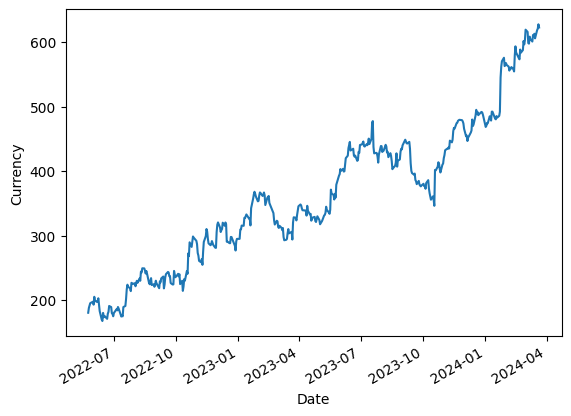

In [56]:
df_two_yr['Adj Close'].plot(xlabel='Date', ylabel='Currency')

Save the processed Data

In [57]:
filename = f'{ticker}_processed_historical'
df_two_yr.to_csv(f'data/{filename}.csv')


## Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library

In [58]:
import pandas as pd


In [59]:
df = pd.read_csv(f'data/{filename}.csv', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,,
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400,3.987651,UP
2022-05-25,180.279999,188.869995,180.169998,187.830002,187.830002,8522100,1.865200,UP
2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900,1.941702,UP
2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,1.139587,UP
2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,-2.348245,DOWN
...,...,...,...,...,...,...,...,...
2024-03-15,622.919983,622.919983,603.820007,605.880005,605.880005,6670900,2.022997,UP
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200,0.378576,UP
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600,1.107236,UP


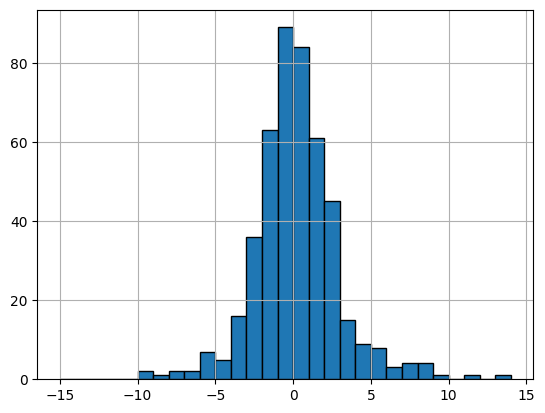

In [63]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

In [64]:
df.change_tomorrow.std()

2.719991801027157

In [71]:
# random forest classifier model works on positive sums, hence we're changing it to 1 or -1 value
df['change_tomorrow_val'] = np.where(df.change_tomorrow > 0, 1, -1)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_tomorrow_direction,change_tomorrow_val
Date,,,,,,,,,
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400,3.987651,UP,1
2022-05-25,180.279999,188.869995,180.169998,187.830002,187.830002,8522100,1.865200,UP,1
2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900,1.941702,UP,1
2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,1.139587,UP,1
2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,-2.348245,DOWN,-1
...,...,...,...,...,...,...,...,...,...
2024-03-15,622.919983,622.919983,603.820007,605.880005,605.880005,6670900,2.022997,UP,1
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200,0.378576,UP,1
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600,1.107236,UP,1


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
y = df.change_tomorrow_val
X = df.drop(columns=['change_tomorrow','change_tomorrow_direction', 'change_tomorrow_val'])

In [73]:
model_rf = RandomForestClassifier(max_depth=7, random_state=42)


In [74]:
model_rf.fit(X, y)

RandomForestClassifier(max_depth=7, random_state=42)

In [76]:
model_rf.score(X, y)

0.9411764705882353

In [87]:
X.iloc[[-1],:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,630.650024,634.359985,622.330017,622.710022,622.710022,2507700


In [88]:
X.iloc[-1,:]

Open         6.306500e+02
High         6.343600e+02
Low          6.223300e+02
Close        6.227100e+02
Adj Close    6.227100e+02
Volume       2.507700e+06
Name: 2024-03-21 00:00:00, dtype: float64

## Backtesting

In [96]:
X


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400
2022-05-25,180.279999,188.869995,180.169998,187.830002,187.830002,8522100
2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900
2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
...,...,...,...,...,...,...
2024-03-15,622.919983,622.919983,603.820007,605.880005,605.880005,6670900
2024-03-18,613.559998,627.409973,610.450012,618.390015,618.390015,3344200
2024-03-19,615.619995,621.280029,608.000000,620.739990,620.739990,2142600


### Create the Strategy

In [78]:
from backtesting import Backtest, Strategy

In [97]:
class RandomForestClassificationUD(Strategy):
  def init(self):
        self.model = model_rf
        self.already_bought = False

  def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Run the Backtest

In [98]:
bt = Backtest(
    X, RandomForestClassificationUD, cash=10000,
    commission=.002, exclusive_orders=True
)

### Show the report in a DataFrame

In [101]:
results = bt.run()
results

Start                     2022-05-24 00:00:00
End                       2024-03-21 00:00:00
Duration                    667 days 00:00:00
Exposure Time [%]                    99.56427
Equity Final [$]               1911432.677569
Equity Peak [$]                1934446.541764
Return [%]                       19014.326776
Buy & Hold Return [%]               245.29779
Return (Ann.) [%]                 1688.590118
Volatility (Ann.) [%]              661.119509
Sharpe Ratio                         2.554137
Sortino Ratio                      109.357085
Calmar Ratio                       201.485878
Max. Drawdown [%]                   -8.380687
Avg. Drawdown [%]                   -2.093962
Max. Drawdown Duration       23 days 00:00:00
Avg. Drawdown Duration        6 days 00:00:00
# Trades                                  222
Win Rate [%]                        76.576577
Best Trade [%]                      26.401714
Worst Trade [%]                     -6.297462
Avg. Trade [%]                    

In [100]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2022-05-24 00:00:00
End,2024-03-21 00:00:00
Duration,667 days 00:00:00
Exposure Time [%],99.56427
Equity Final [$],1911432.677569
Equity Peak [$],1934446.541764
Return [%],19014.326776


## Plot the backtest report

> Don't worry about this new tool just yet, we will explain in a future chapter how to interpret the following chart.

In [ ]:
bt.plot(filename='reports_reporting/backtesting_nflx.html')

## How to invest based on the numerical increase?

> Instead of the direction (UP or DOWN)

Next chapter → [Backtesting with Regression Models]()

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

Classification Strategy | Regression Strategy
-|-
![](src/res_classification.png) | ![](src/res_regression.png)